# Pre trained network
![imagen](https://www.researchgate.net/publication/336874848/figure/fig1/AS:819325225144320@1572353764073/Illustrations-of-transfer-learning-a-neural-network-is-pretrained-on-ImageNet-and.png)

Estas son las arquitecturas de redes neuronales más utilizadas en la comunidad. Para más detalle sobre el funcionamiento de cada red, consultar el [Hands on Machine Learning for Python](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch14.html#cnn_chapter).
* VGG-16
* VGG-19
* Inception V3
* XCeption
* ResNet-50

Las redes se pueden incorporar entrenadas, o sin entrenar.

## ResNet50V2

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [9]:
base_model = ResNet50V2(input_shape=(224, 224, 3),
                       include_top=True,
                       weights = "imagenet",
                       classifier_activation='softmax')

In [10]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

Cargamos algunas imagenes desde local, para ver qué tal funciona la red ResNet50V2 ya entrenada.

In [11]:
import os


def read_data(path):
    X = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224, 224))
        print(path + '/' + file)
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data('img')

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

img/0_bear-1.jpg
img/1_cat.8016.jpg
img/2_cat.8037.jpg
img/3_dog.11856.jpg
img/4_dog.11857.jpg
img/5_gvt.png
img/6_horse.jpg
img/7_karate.jpg
img/8_pizza.jpg
(9, 224, 224, 3)


In [12]:
preds = base_model.predict(x_test)

decodes = decode_predictions(preds, top=5)

for i, j in enumerate(decodes):
    print('##################')
    print(i)
    for i, decode in enumerate(j):
        print('Predicted:\n', decode[1], decode[2])

##################
0
Predicted:
 brown_bear 0.99944395
Predicted:
 chow 0.00054155965
Predicted:
 American_black_bear 8.781004e-06
Predicted:
 ice_bear 1.1076168e-06
Predicted:
 howler_monkey 4.4061815e-07
##################
1
Predicted:
 Egyptian_cat 0.64985013
Predicted:
 Siamese_cat 0.1678732
Predicted:
 tiger_cat 0.06044934
Predicted:
 lynx 0.024389736
Predicted:
 tabby 0.017880348
##################
2
Predicted:
 Egyptian_cat 0.82098377
Predicted:
 lynx 0.12679444
Predicted:
 Siamese_cat 0.021530677
Predicted:
 tabby 0.020569673
Predicted:
 tiger_cat 0.007405393
##################
3
Predicted:
 Rottweiler 0.7329095
Predicted:
 Brabancon_griffon 0.085084885
Predicted:
 Staffordshire_bullterrier 0.03105935
Predicted:
 EntleBucher 0.023099253
Predicted:
 Doberman 0.019871445
##################
4
Predicted:
 collie 0.99525696
Predicted:
 Shetland_sheepdog 0.004742957
Predicted:
 yellow_lady's_slipper 9.142558e-09
Predicted:
 goldfinch 8.13325e-09
Predicted:
 groenendael 7.5366025e-09


## VGG16
En este caso vamos a importar la red VGG16, que utilizaremos como red preentrenada y completaremos con una fully connected layer. 

In [18]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [30]:
batch_size = 32
img_height = 48
img_width = 48

data_dir = "Z:\\Data_Science\\Data\\how_am_i_feeling\\train"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6176 files belonging to 2 classes.
Using 4941 files for training.
Found 6176 files belonging to 2 classes.
Using 1235 files for validation.


In [31]:
print(train_ds.class_names)


['happy', 'sadness']


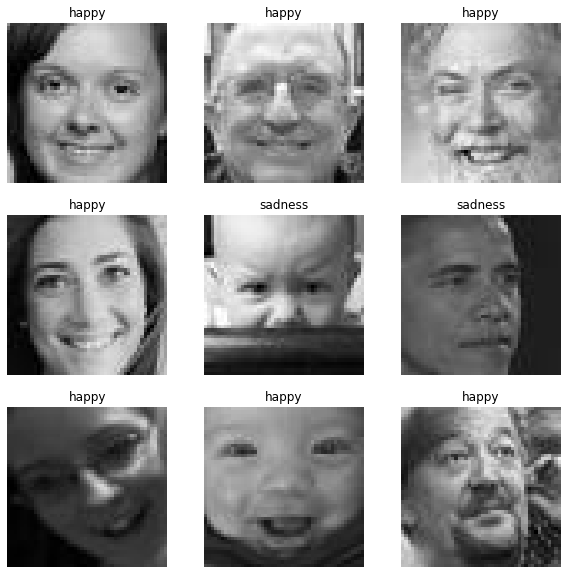

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [33]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 3)
(32,)


In [38]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (img_height, img_height, 3),
                  include_top=False,
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

58892288/58889256 [==============================] - 4s 0us/step


In [44]:
vgghist = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 5,
                    verbose=1)

Epoch 1/5
155/155 [==============================] - 18s 115ms/step - loss: 0.4281 - acc: 0.8063 - val_loss: 0.7362 - val_acc: 0.7036
Epoch 2/5
155/155 [==============================] - 18s 119ms/step - loss: 0.3850 - acc: 0.8264 - val_loss: 0.7084 - val_acc: 0.7036
Epoch 3/5
155/155 [==============================] - 18s 118ms/step - loss: 0.3443 - acc: 0.8508 - val_loss: 0.7361 - val_acc: 0.7223
Epoch 4/5
155/155 [==============================] - 18s 119ms/step - loss: 0.3308 - acc: 0.8563 - val_loss: 0.7337 - val_acc: 0.7126
Epoch 5/5
155/155 [==============================] - 18s 117ms/step - loss: 0.3089 - acc: 0.8711 - val_loss: 0.7893 - val_acc: 0.7174


## Resnet v2

https://keras.io/api/applications/resnet/

In [52]:

from tensorflow.keras.applications.resnet_v2 import ResNet152V2

base_model_resnet = ResNet152V2(input_shape = (img_height, img_height,3),
                        include_top = False,
                        weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [56]:
x = layers.Flatten()(base_model_resnet.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model_resnet.input, x)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

inc_history = model.fit(train_ds,
                       validation_data = val_ds,
                       steps_per_epoch = 100,
                       epochs = 2,
                       verbose=1)

Epoch 1/2
100/100 [==============================] - 203s 2s/step - loss: 0.8975 - acc: 0.5350 - val_loss: 172.7441 - val_acc: 0.5223
Epoch 2/2
100/100 [==============================] - 106s 1s/step - loss: 0.7122 - acc: 0.5215 - val_loss: 375.1664 - val_acc: 0.5223


### Inception - No se puede si no son 75x75 como mínimo

In [49]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (75, 75,3),
                        include_top = False,
                        weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 9s 0us/step


In [50]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

inc_history = model.fit(train_ds,
                       validation_data = val_ds,
                       steps_per_epoch = 100,
                       epochs = 2)

Epoch 1/2


ValueError: in user code:

    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 75, 75, 3), found shape=(None, 48, 48, 3)
